# Lab 2

Due to difficulties acquiring readings from the mokuGo, the measurements used in the report was recorded by Nick Coles.

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Converts .txt files from LTspice (with changed suffix) to pandas dataframe
def sim2df (simFile):
    
    simFile = pd.read_csv(simFile, sep='\t')
    simFile[['Magnitude (dB)','Phase (deg)']] = simFile['V(vout)'].str.split(',', expand=True)
    simFile = simFile.rename(columns={'Freq.' :'Frequency (Hz)'})

    simFile['Magnitude (dB)'] = simFile['Magnitude (dB)'].str.removeprefix('(')
    simFile['Magnitude (dB)'] = simFile['Magnitude (dB)'].str.removesuffix('dB')
    simFile['Magnitude (dB)'] = simFile['Magnitude (dB)'].astype(float)

    simFile['Phase (deg)'] = simFile['Phase (deg)'].str.removesuffix('�)')
    simFile['Phase (deg)'] = simFile['Phase (deg)'].astype(float)

    simFile = simFile.drop('V(vout)', axis=1)
    
    return simFile

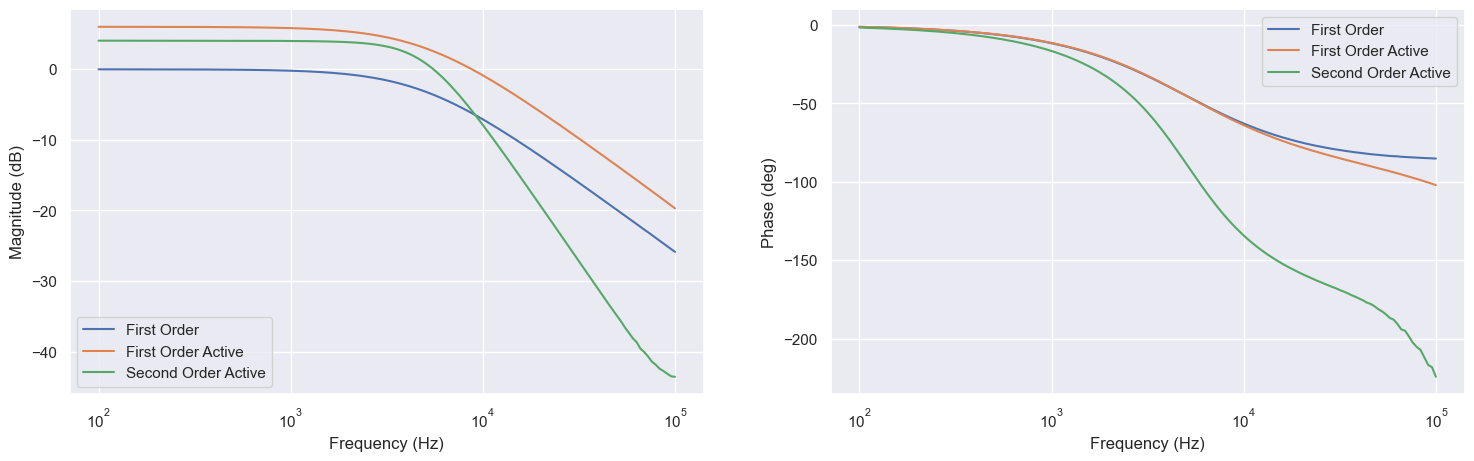

In [20]:
# Read data
lpFO = pd.read_csv('lpf/Sig_Lab2_LP_FO.csv')
lpSK = pd.read_csv('lpf/Sig_Lab2_LP_SK_Active.csv')
lpSO = pd.read_csv('lpf/Sig_Lab2_LP_SO_Active.csv')

# Set up figure
sns.set_theme(context='notebook', style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(18,5))

# Magnitude plot
axs[0].semilogx(lpFO['Frequency (Hz)'], lpFO['Channel 2 Magnitude (dB)'], label='First Order')
axs[0].semilogx(lpSO['Frequency (Hz)'], lpSO['Channel 2 Magnitude (dB)'], label='First Order Active')
axs[0].semilogx(lpSK['Frequency (Hz)'], lpSK['Channel 2 Magnitude (dB)'], label='Second Order Active')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].legend()

# Phase plot
axs[1].semilogx(lpFO['Frequency (Hz)'], lpFO['Channel 2 Phase (deg)'], label='First Order')
axs[1].semilogx(lpSO['Frequency (Hz)'], lpSO['Channel 2 Phase (deg)'], label='First Order Active')
axs[1].semilogx(lpSK['Frequency (Hz)'], lpSK['Channel 2 Phase (deg)'], label='Second Order Active')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (deg)')
axs[1].legend()
plt.show()

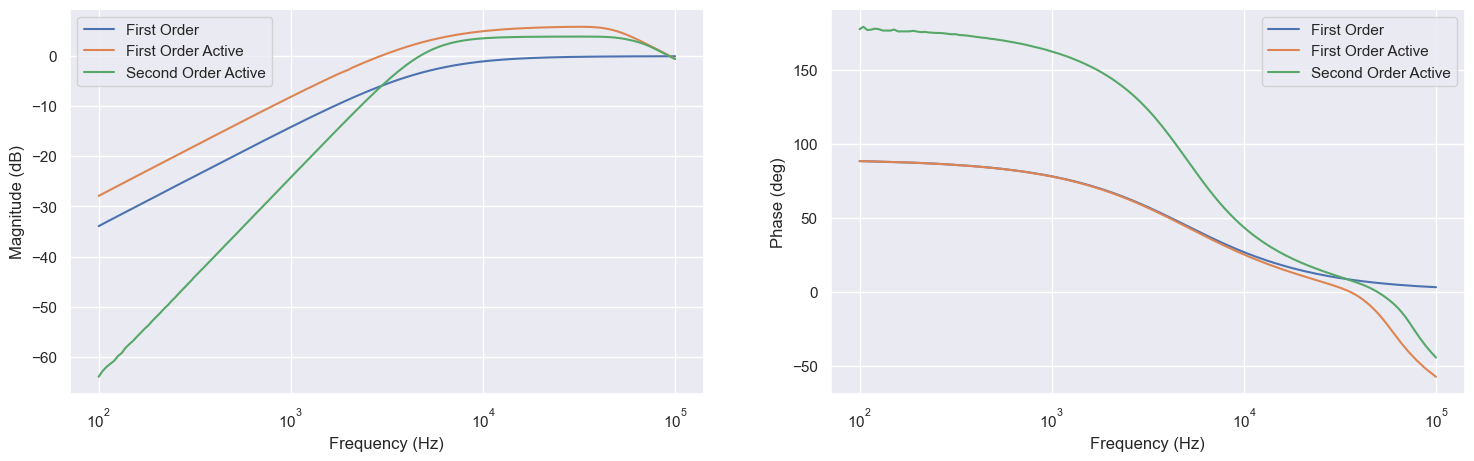

In [24]:
# Read data
hpFO = pd.read_csv('hpf/Sig_Lab2_HP_FO.csv')
hpSK = pd.read_csv('hpf/Sig_Lab2_HP_SK_Active.csv')
hpSO = pd.read_csv('hpf/Sig_Lab2_HP_SO_Active.csv')

# Set up figure
sns.set_theme(context='notebook', style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(18,5))

# Magnitude plot
axs[0].semilogx(hpFO['Frequency (Hz)'], hpFO['Channel 2 Magnitude (dB)'], label='First Order')
axs[0].semilogx(hpSO['Frequency (Hz)'], hpSO['Channel 2 Magnitude (dB)'], label='First Order Active')
axs[0].semilogx(hpSK['Frequency (Hz)'], hpSK['Channel 2 Magnitude (dB)'], label='Second Order Active')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].legend()

# Phase plot
axs[1].semilogx(hpFO['Frequency (Hz)'], hpFO['Channel 2 Phase (deg)'], label='First Order')
axs[1].semilogx(hpSO['Frequency (Hz)'], hpSO['Channel 2 Phase (deg)'], label='First Order Active')
axs[1].semilogx(hpSK['Frequency (Hz)'], hpSK['Channel 2 Phase (deg)'], label='Second Order Active')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (deg)')
axs[1].legend()
plt.show()

### First Order Low Pass Filter

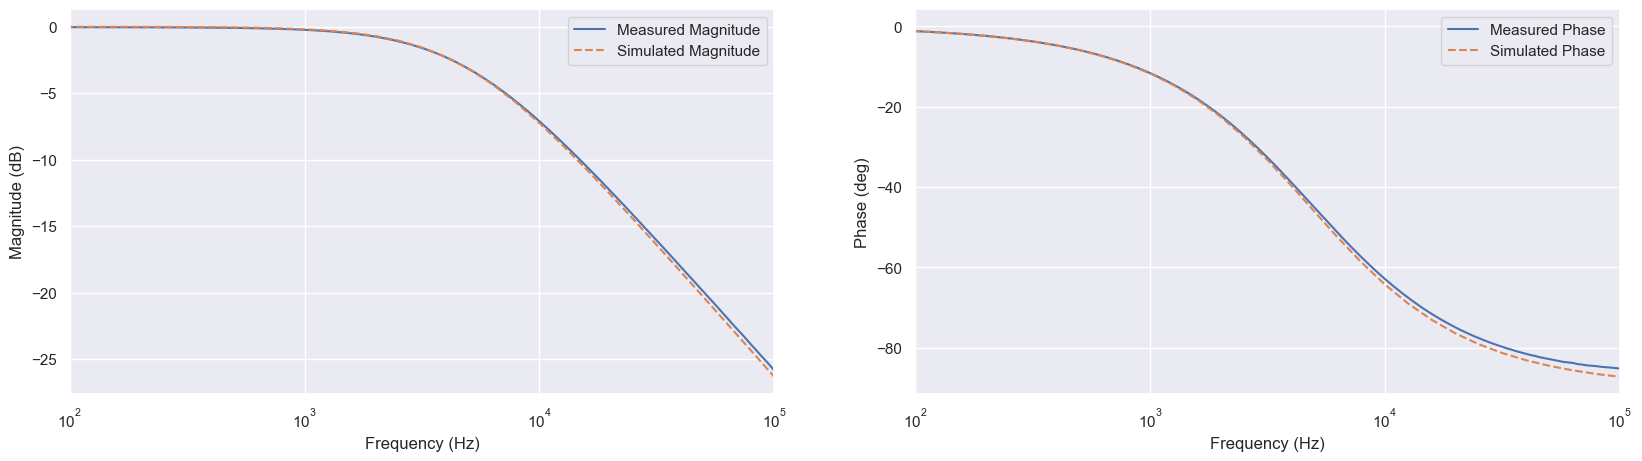

In [5]:
# Read data
lpFO = pd.read_csv('lpf/Sig_Lab2_LP_FO.csv')
simLPFO = sim2df('sim/lpFO.csv')

# Set up figure
sns.set_theme(context='notebook', style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(20,5))

# Magnitude plot
axs[0].semilogx(lpFO['Frequency (Hz)'], lpFO['Channel 2 Magnitude (dB)'], label='Measured Magnitude')
axs[0].semilogx(simLPFO['Frequency (Hz)'], simLPFO['Magnitude (dB)'], label='Simulated Magnitude', linestyle='dashed')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].set_xlim([100, 100000])
axs[0].legend()

# Phase plot
axs[1].semilogx(lpFO['Frequency (Hz)'], lpFO['Channel 2 Phase (deg)'], label='Measured Phase')
axs[1].semilogx(simLPFO['Frequency (Hz)'], simLPFO['Phase (deg)'], label='Simulated Phase', linestyle='dashed')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (deg)')
axs[1].set_xlim([100, 100000])
axs[1].legend()

plt.show()

### First Order Active Low Pass Filter

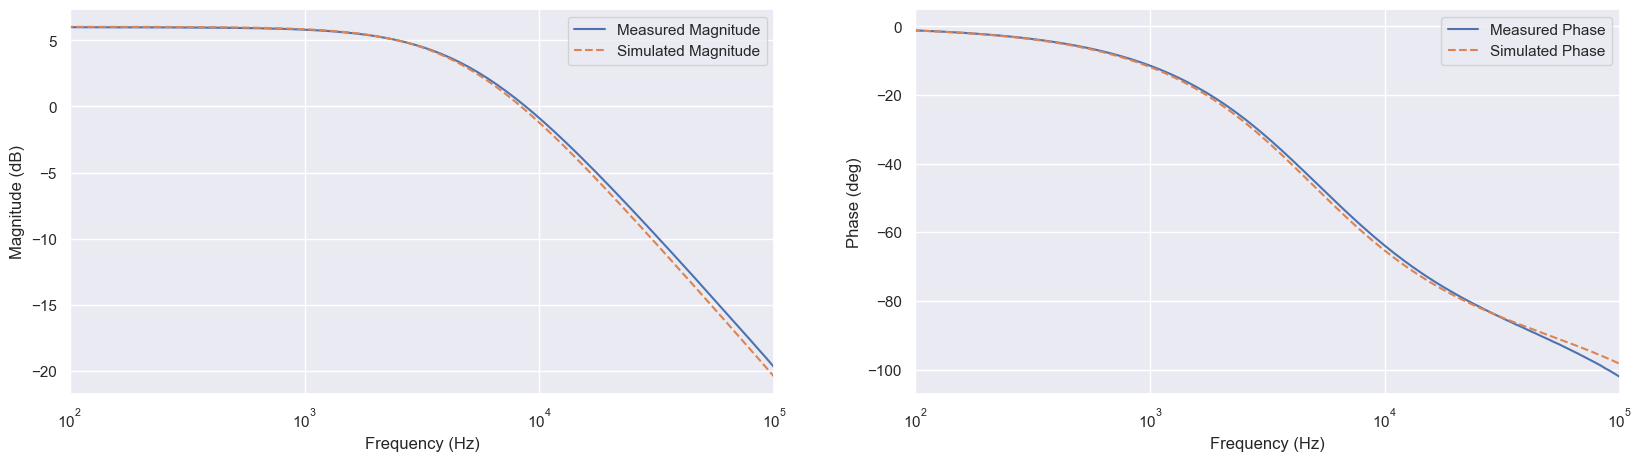

In [18]:
# Read data
lpSK = pd.read_csv('lpf/Sig_Lab2_LP_SO_Active.csv')
simLPSK = sim2df('sim/lpSK.csv')

# Set up figure
sns.set_theme(context='notebook', style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(20,5))

# Magnitude plot
axs[0].semilogx(lpSK['Frequency (Hz)'], lpSK['Channel 2 Magnitude (dB)'], label='Measured Magnitude')
axs[0].semilogx(simLPSK['Frequency (Hz)'], simLPSK['Magnitude (dB)'], label='Simulated Magnitude', linestyle='dashed')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].set_xlim([100, 100000])
axs[0].legend()

# Phase plot
axs[1].semilogx(lpSK['Frequency (Hz)'], lpSK['Channel 2 Phase (deg)'], label='Measured Phase')
axs[1].semilogx(simLPSK['Frequency (Hz)'], simLPSK['Phase (deg)'], label='Simulated Phase', linestyle='dashed')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (deg)')
axs[1].set_xlim([100, 100000])
axs[1].legend()

plt.show()

### Second Order Active Low Pass Filter

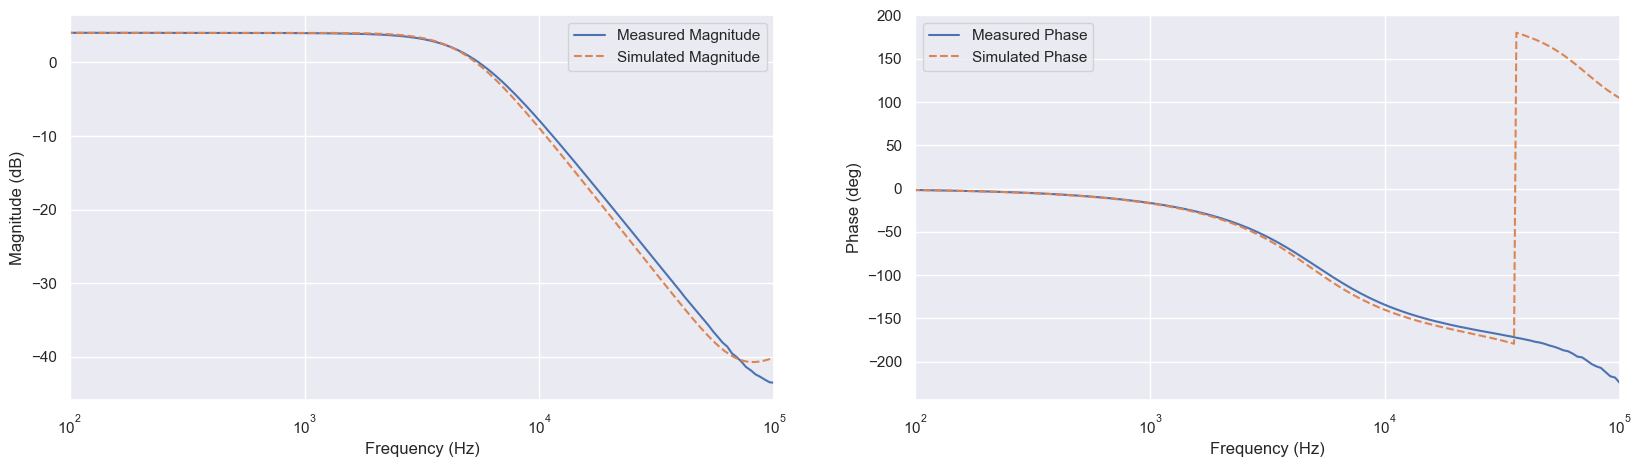

In [17]:
# Read data
lpSO = pd.read_csv('lpf/Sig_Lab2_LP_SK_Active.csv')
simLPSO = sim2df('sim/lpSO.csv')

# Set up figure
sns.set_theme(context='notebook', style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(20,5))

# Magnitude plot
axs[0].semilogx(lpSO['Frequency (Hz)'], lpSO['Channel 2 Magnitude (dB)'], label='Measured Magnitude')
axs[0].semilogx(simLPSO['Frequency (Hz)'], simLPSO['Magnitude (dB)'], label='Simulated Magnitude', linestyle='dashed')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].set_xlim([100, 100000])
axs[0].legend()

# Phase plot
axs[1].semilogx(lpSO['Frequency (Hz)'], lpSO['Channel 2 Phase (deg)'], label='Measured Phase')
axs[1].semilogx(simLPSO['Frequency (Hz)'], simLPSO['Phase (deg)'], label='Simulated Phase', linestyle='dashed')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (deg)')
axs[1].set_xlim([100, 100000])
axs[1].legend()

plt.show()

### First Order High Pass Filter

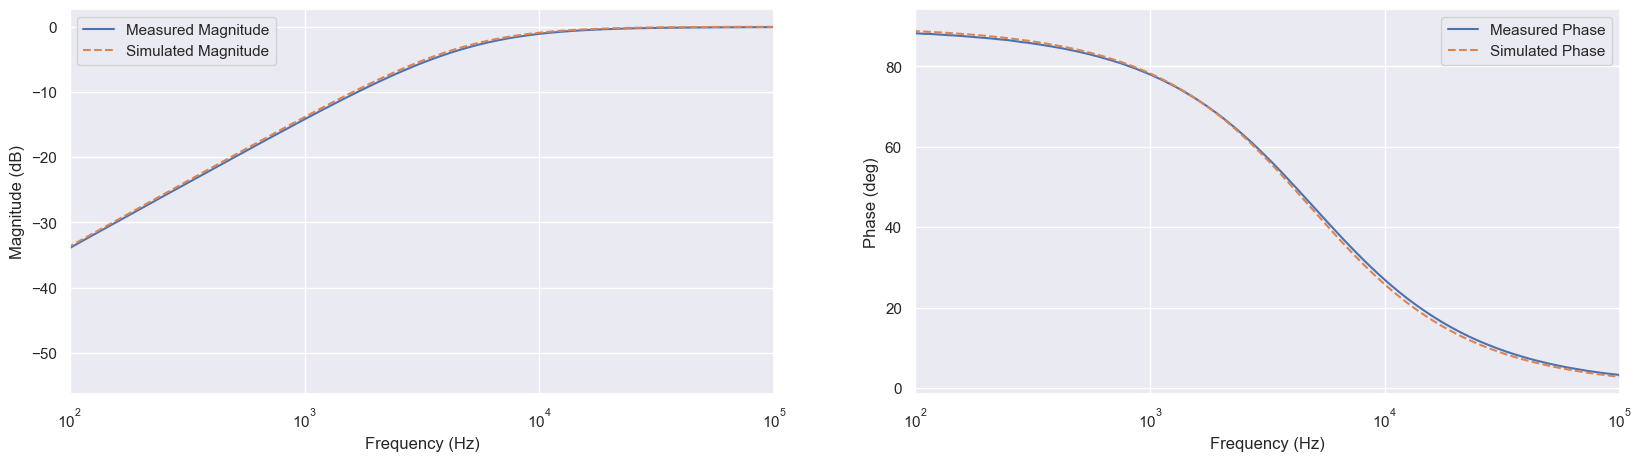

In [ ]:
# Read data
hpFO = pd.read_csv('hpf/Sig_Lab2_HP_FO.csv')
simHPFO = sim2df('sim/hpFO.csv')

# Set up figure
sns.set_theme(context='notebook', style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(20,5))

# Magnitude plot
axs[0].semilogx(hpFO['Frequency (Hz)'], hpFO['Channel 2 Magnitude (dB)'], label='Measured Magnitude')
axs[0].semilogx(simHPFO['Frequency (Hz)'], simHPFO['Magnitude (dB)'], label='Simulated Magnitude', linestyle='dashed')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].set_xlim([100, 100000])
axs[0].legend()

# Phase plot
axs[1].semilogx(hpFO['Frequency (Hz)'], hpFO['Channel 2 Phase (deg)'], label='Measured Phase')
axs[1].semilogx(simHPFO['Frequency (Hz)'], simHPFO['Phase (deg)'], label='Simulated Phase', linestyle='dashed')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (deg)')
axs[1].set_xlim([100, 100000])
axs[1].legend()

plt.show()

### First Order Active High Pass Filter

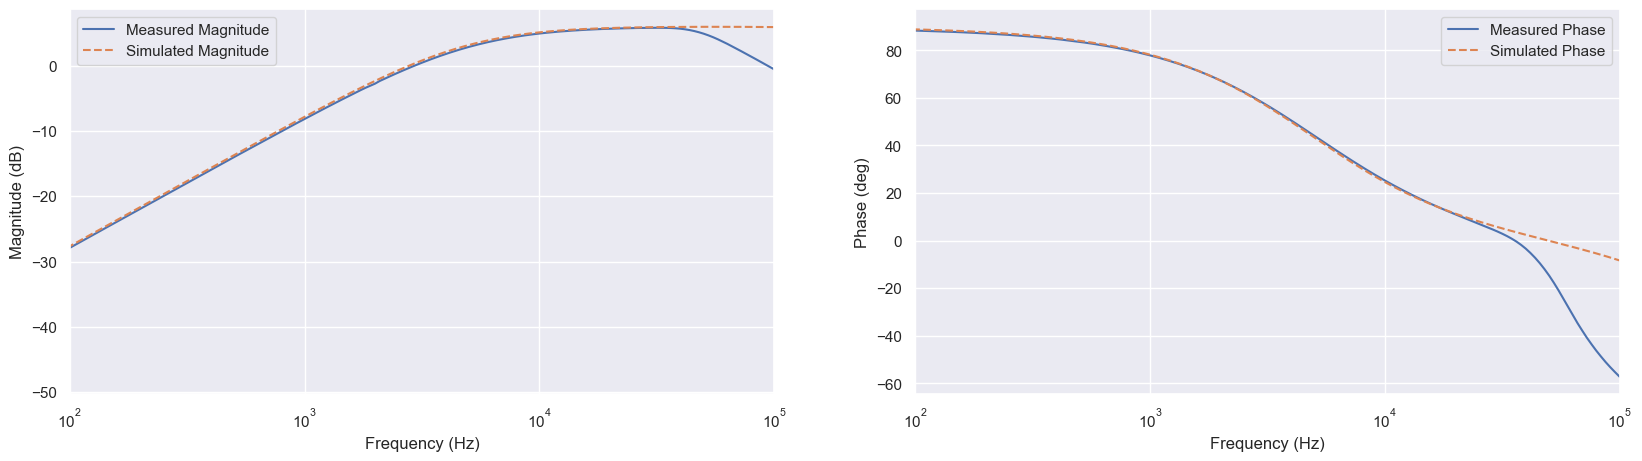

In [23]:
# Read data
hpSK = pd.read_csv('hpf/Sig_Lab2_HP_SO_Active.csv')
simHPSK = sim2df('sim/hpSK.csv')

# Set up figure
sns.set_theme(context='notebook', style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(20,5))

# Magnitude plot
axs[0].semilogx(hpSK['Frequency (Hz)'], hpSK['Channel 2 Magnitude (dB)'], label='Measured Magnitude')
axs[0].semilogx(simHPSK['Frequency (Hz)'], simHPSK['Magnitude (dB)'], label='Simulated Magnitude', linestyle='dashed')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].set_xlim([100, 100000])
axs[0].legend()

# Phase plot
axs[1].semilogx(hpSK['Frequency (Hz)'], hpSK['Channel 2 Phase (deg)'], label='Measured Phase')
axs[1].semilogx(simHPSK['Frequency (Hz)'], simHPSK['Phase (deg)'], label='Simulated Phase', linestyle='dashed')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (deg)')
axs[1].set_xlim([100, 100000])
axs[1].legend()

plt.show()

### Second Order Active High Pass Filter

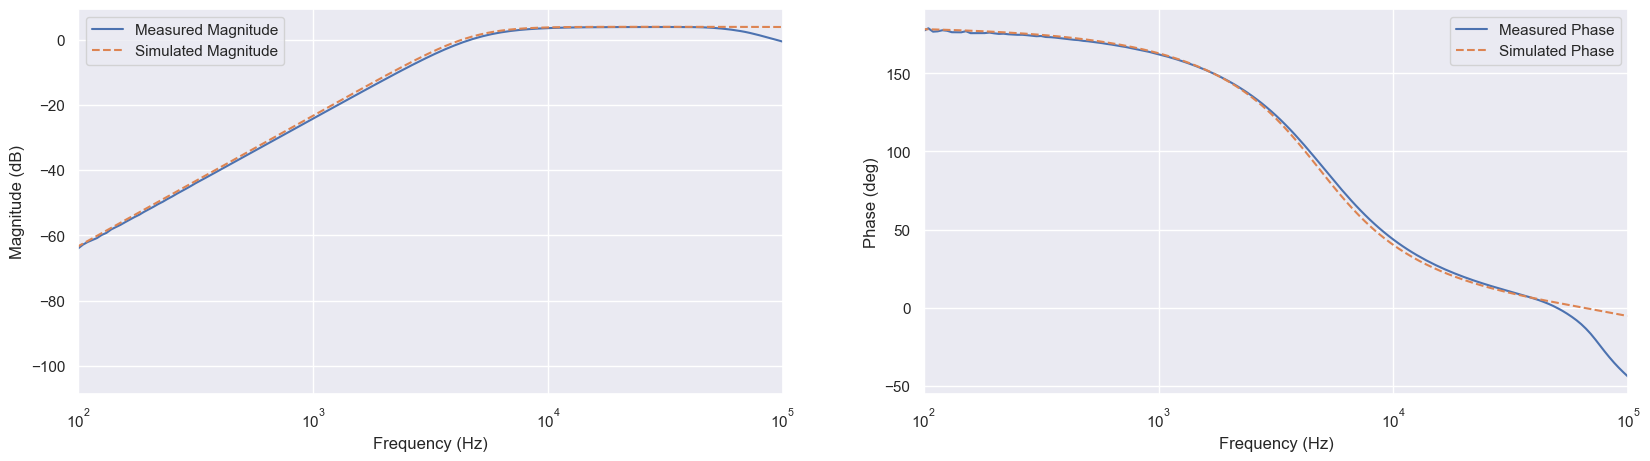

In [26]:
# Read data
hpSO = pd.read_csv('hpf/Sig_Lab2_HP_SK_Active.csv')
simHPSO = sim2df('sim/hpSO.csv')

# Set up figure
sns.set_theme(context='notebook', style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(20,5))

# Magnitude plot
axs[0].semilogx(hpSO['Frequency (Hz)'], hpSO['Channel 2 Magnitude (dB)'], label='Measured Magnitude')
axs[0].semilogx(simHPSO['Frequency (Hz)'], simHPSO['Magnitude (dB)'], label='Simulated Magnitude', linestyle='dashed')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].set_xlim([100, 100000])
axs[0].legend()

# Phase plot
axs[1].semilogx(hpSO['Frequency (Hz)'], hpSO['Channel 2 Phase (deg)'], label='Measured Phase')
axs[1].semilogx(simHPSO['Frequency (Hz)'], simHPSO['Phase (deg)'], label='Simulated Phase', linestyle='dashed')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (deg)')
axs[1].set_xlim([100, 100000])
axs[1].legend()

plt.show()

In [40]:
def plotFFT (FFT):
    # Set up figure
    sns.set_theme(context='notebook', style='darkgrid')
    fig, axs = plt.subplots(1, 1, figsize=(10,5))

    # Magnitude plot
    axs.semilogx(FFT['Frequency (Hz)'], FFT['Trace 1 (V)'], label='Trace 1')
    axs.semilogx(FFT['Frequency (Hz)'], FFT['Trace 2 (V)'], label='Trace 2', linestyle='dashed')
    axs.set_xlabel('Frequency (Hz)')
    axs.set_ylabel('Amplitude (V)')
    axs.set_xlim([100, 100000])
    axs.legend()

    plt.show()

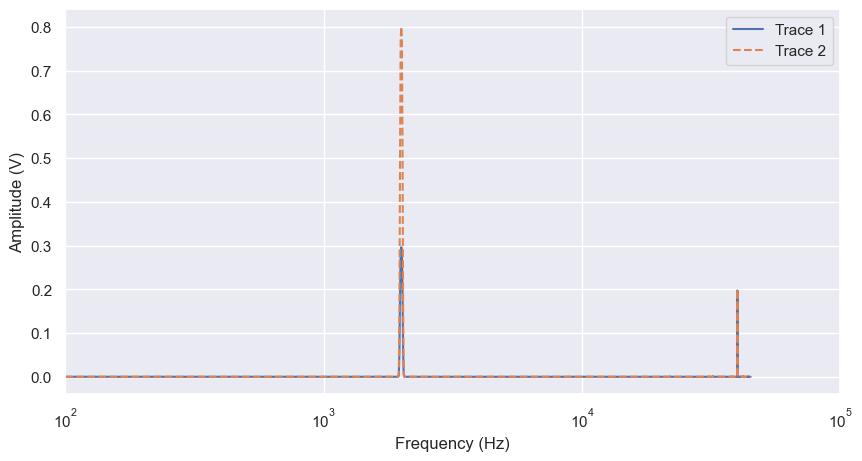

In [41]:
hpFOFFT = pd.read_csv('hpf/Sig_Lab2_HP_FO_FFT.csv')

plotFFT(hpFOFFT)


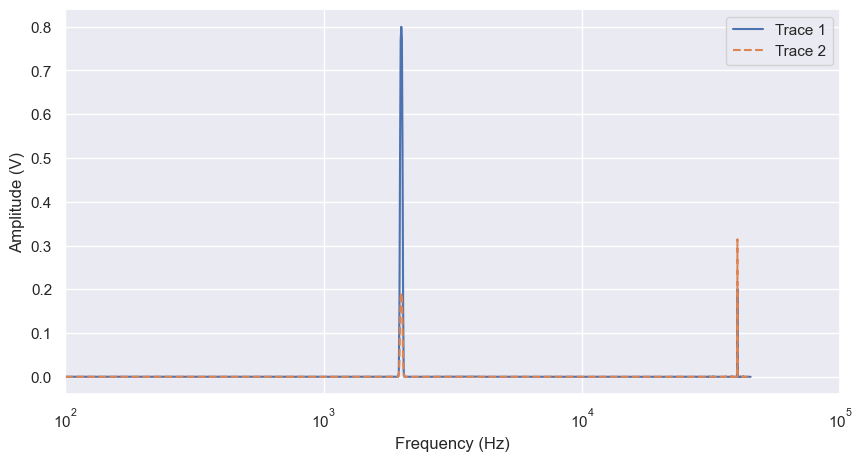

In [43]:
hpSKFFT = pd.read_csv('hpf/Sig_Lab2_HP_SK_Active_FFT.csv')

plotFFT(hpSKFFT)

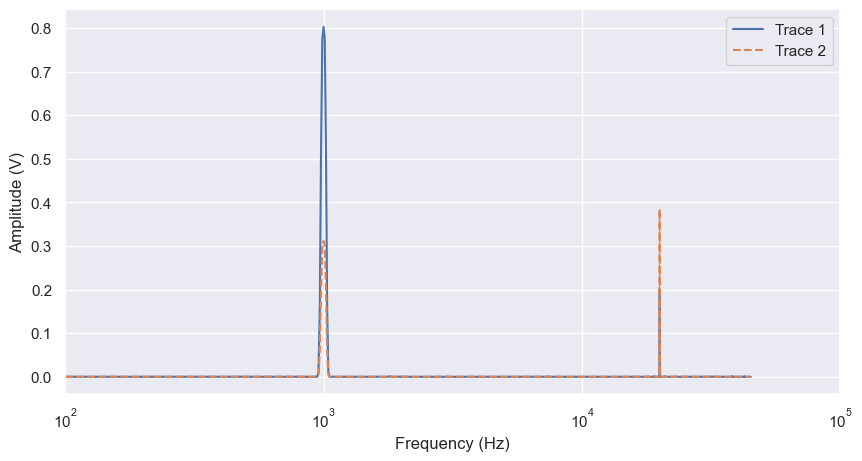

In [44]:
hpSKFFT = pd.read_csv('hpf/Sig_Lab2_HP_SO_Active_FFT.csv')

plotFFT(hpSKFFT)